In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [17]:
# define the fonts to use for plots
family = 'Myriad Pro'
title_font = fm.FontProperties(family=family, style='normal', size=20, weight='normal', stretch='normal')
label_font = fm.FontProperties(family=family, style='normal', size=16, weight='normal', stretch='normal')
ticks_font = fm.FontProperties(family=family, style='normal', size=12, weight='normal', stretch='normal')

In [18]:
# load the csv data file
data = pd.read_csv('../resources/messages.csv')

In [19]:
# convert raw timestamps to pandas Timestamp objects
timestamps = [*map(lambda ts : pd.Timestamp(ts, unit='ms'), data['timestamp'])]
all_dates = [*map(lambda pts : pts.date(), timestamps)]
all_times = [*map(lambda pts : pts.time(), timestamps)]

In [27]:
# get count per date
date_counts = pd.Series(all_dates).value_counts().sort_index()
print('There are {:,} dates with messages.'.format(len(date_counts)))
date_counts

There are 2,659 dates with messages.


2011-03-12    60
2011-03-13    24
2011-03-14    17
2011-03-15     6
2011-03-16     1
              ..
2020-05-01    97
2020-05-03    53
2020-05-04    70
2020-05-05    91
2020-05-06     8
Length: 2659, dtype: int64

In [28]:
# Fill the dates when there was zero chat traffic
date_range = pd.date_range(start=min(all_dates), end=max(all_dates))
date_counts = date_counts.reindex(date_range, fill_value=0)
print('There are {:,} dates total in the range, with or without messages.'.format(len(date_counts)))
date_counts

There are 3,344 dates total in the range, with or without messages.


2011-03-12    60
2011-03-13    24
2011-03-14    17
2011-03-15     6
2011-03-16     1
              ..
2020-05-02     0
2020-05-03    53
2020-05-04    70
2020-05-05    91
2020-05-06     8
Freq: D, Length: 3344, dtype: int64

In [29]:
# create a series of labels for the plot: each new year's day
xlabels = pd.Series([date if '01-01' in sdate else None for date in date_counts.index])
xlabels = xlabels[pd.notnull(xlabels)]

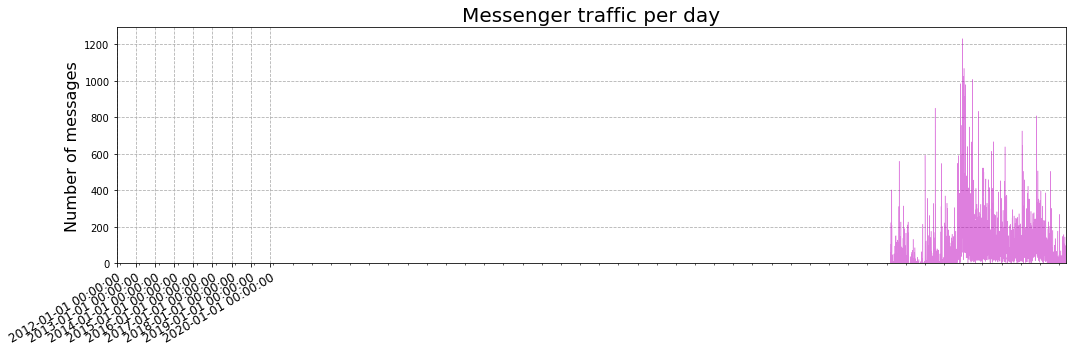

In [30]:
# plot the counts per day
fig = plt.figure(figsize=[15, 5])
ax = date_counts.plot(kind='line', linewidth=0.5, alpha=0.5, color='m')

ax.set_ylim(bottom=0)
ax.grid(True, linestyle='--')
ax.set_xticks(xlabels.index)
ax.set_xticklabels(xlabels, rotation=30, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
ax.set_ylabel('Number of messages', fontproperties=label_font)
ax.set_title('Messenger traffic per day', fontproperties=title_font)

fig.tight_layout()
plt.show()